## Data Science and MLOps Landscape in Industry
### https://www.kaggle.com/code/eraikako/data-science-and-mlops-landscape-in-industrynotebook#What's-the-state-of-Machine-Learning-adoption-in-the-enterprise-today?

#### 관련 라이브러리

In [1]:
# 관련 라이브러리 import 
import pandas as pd
import numpy as np
import json
from collections import Counter

import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from plotly.colors import n_colors

from IPython.core.display import display, HTML, Javascript 
import IPython.display
from IPython.display import display, clear_output

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\AppData\Local\Temp\ipykernel_25980\536625001.py:14: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



### 1. 데이터 확인 및 시각화 함수 생성

In [2]:
df = pd.read_csv('G:\--backup--\Desktop\zero-base\data\kaggle_survey_2022_responses.csv')
questions_titles = df[:1]
questions_titles

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...


In [4]:
df = df[1:]
df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
5,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
6,277,18-21,Woman,India,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...","YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [21]:
df.shape

(23996, 296)

In [5]:
"""스캐터 플롯을 생성하는 함수"""
def create_scatter_plot(
    x_axis_values,  # 스캐터 플롯의 X축 값
    y_axis_values,  # 스캐터 플롯의 Y축 값
    hover_template,  # 마우스 오버 시 표시되는 텍스트 템플릿
    marker_color,  # 마커의 색상 값
    marker_size,  # 마커의 크기
    title,  # 스캐터 플롯의 제목
    subtitle,  # 스캐터 플롯의 부제목
    subtitle_explain  # 부제목에 대한 추가 설명
):
    

    # 스캐터 플롯의 데이터를 정의
    trace = go.Scatter(
        x=x_axis_values,  # X축 데이터
        y=y_axis_values,  # Y축 데이터
        mode='markers',  # 마커만 표시하는 모드
        hovertemplate=hover_template,  # 마우스 오버 시 표시할 텍스트 템플릿
        marker=dict(
            color=marker_color,  # 마커의 색상
            size=marker_size,  # 마커의 크기
            showscale=True,  # 색상 범례 표시 여부
            colorbar=dict(title="Percent"),  # 색상 범례의 제목
            opacity=0.7,  # 마커의 투명도
            colorscale='RdBu_r'  # 마커의 색상 스케일
        )
    )

    # 레이아웃 정의
    layout = go.Layout(
        width=900,  # 플롯의 너비
        height=950,  # 플롯의 높이
        plot_bgcolor="#fff",  # 플롯 배경색
        paper_bgcolor="#fff",  # 전체 배경색
        showlegend=False,  # 범례 표시 여부 (False로 설정)
        title={
            'text': f"<span style='font-size:30px; font-family:Times New Roman'>{title}</span><br><br>"
                    f"<sup>{subtitle}</sup><br><sup>{subtitle_explain}</sup>",  # 제목 및 부제목 (HTML 스타일 적용)
            'x': 0.5,  # 제목의 가로 정렬 위치 (가운데 정렬)
            'xanchor': 'center'
        },
        font={"color": '#7b6b59'},  # 텍스트 색상 스타일
        margin=dict(t=170),  # 위쪽 여백
    )

    # 데이터를 사용해 플롯 생성
    fig = go.Figure(data=[trace], layout=layout)

    # X축 속성 업데이트
    fig.update_xaxes(
        showline=False,  # X축 선 표시 여부
        linewidth=1,  # 축선의 두께
        linecolor='#c9c4c3',  # 축선의 색상
        gridcolor='#c9c4c3',  # 격자선 색상
        tickfont=dict(size=14, family='Verdana', color='#7b6b59'),  # 축 눈금의 텍스트 스타일
        title="",  # X축 제목
        title_font=dict(size=14, family='Verdana', color='#f57369'),  # X축 제목의 폰트 스타일
        showgrid=False,  # 격자선 표시 여부
        tickangle=325  # 눈금 텍스트 회전 각도
    )

    # Y축 속성 업데이트
    fig.update_yaxes(
        showline=False,  # Y축 선 표시 여부
        linewidth=1,  # 축선의 두께
        linecolor='#000',  # 축선의 색상
        gridcolor='#fff',  # 격자선 색상
        tickfont=dict(size=14, family='Verdana', color='#a43725'),  # 축 눈금의 텍스트 스타일
        title="",  # Y축 제목
        title_font=dict(size=14, family='Verdana', color='#f57369'),  # Y축 제목의 폰트 스타일
        showgrid=False  # 격자선 표시 여부
    )

    # 플롯 표시
    fig.show()
    
    
"""바 플롯의 트레이스를 생성하는 함수"""
def get_bar_plot_trace(x_values, y_values, display_text, top_n, rest_n, hovertext, orientation="h"):
    

    # 바 플롯의 데이터 정의
    trace = go.Bar(
        y=y_values,  # Y축 데이터
        x=x_values,  # X축 데이터
        name="",  # 이름 없음
        orientation=orientation,  # 바의 방향 (기본은 가로)
        marker=dict(
            color=["#E6b6a4"] * rest_n + ["#a43725"] * top_n  # 상위 N개의 색상과 나머지 색상
        ),
        text=display_text,  # 막대에 표시될 텍스트
        texttemplate="<b style='color: #fff'>%{text}% </b>",  # 텍스트 스타일
        textposition=["outside"] * rest_n + ["inside"] * top_n,  # 텍스트 위치
        hovertext=hovertext  # 마우스 오버 시 텍스트
    )

    return trace  # 생성한 트레이스 반환



"""단일 바 플롯을 생성하는 함수"""
def create_single_bar_plot(x_values, y_values, display_text, top_n, rest_n, hovertext, title, subtitle="", orientation="h"):

    # 바 플롯 트레이스를 생성
    trace = get_bar_plot_trace(x_values, y_values, display_text, top_n, rest_n, hovertext, orientation)

    # 제목 스타일 정의
    large_title_format = f"<span style='font-size:30px; font-family:Times New Roman'>{title}</span>"

    # 레이아웃 정의
    layout = dict(
        title=large_title_format,  # 제목
        font=dict(color='#7b6b59'),  # 텍스트 스타일
        margin=dict(t=120),  # 위쪽 여백
        yaxis={'categoryorder': 'array', 'categoryarray': x_values},  # Y축 정렬
        xaxis=dict(
            side="top",  # X축 위치
            zerolinecolor="#4d4d4d",  # 0선 색상
            zerolinewidth=0.5,  # 0선 두께
            gridcolor="#e7e7e7",  # 격자선 색상
            tickformat=",.1%"  # 눈금 형식
        ),
        width=800,  # 플롯 너비
        height=700,  # 플롯 높이
        plot_bgcolor="white"  # 플롯 배경색
    )

    # 플롯 생성
    fig = go.Figure(data=trace, layout=layout)

    # 플롯 표시
    fig.show()
    
    
"""박스 플롯을 생성하는 함수"""
def create_box_plot(df, x_column_name, y_column_name, title):
    

    # Plotly Express를 사용하여 박스 플롯 생성
    fig = px.box(
        df,  # 데이터프레임
        x=x_column_name,  # X축 데이터
        y=y_column_name,  # Y축 데이터
        title=f"<span style='font-size:30px; color:#7b6b59; font-family:Times New Roman'>{title}</span>"  # 제목
    )

    # 추가 스타일 정의
    layout = go.Layout(
        xaxis={"title": ""},  # X축 제목 없음
        yaxis={"title": "Compensation in USD"},  # Y축 제목
        font=dict(color='black'),  # 텍스트 색상
        paper_bgcolor='rgba(0,0,0,0)',  # 종이 배경 투명
        plot_bgcolor='rgba(0,0,0,0)',  # 플롯 배경 투명
        height=800,  # 플롯 높이
        width=1050  # 플롯 너비
    )

    # 레이아웃 및 스타일 업데이트
    fig.update_layout(layout)
    fig.update_yaxes(showline=True, linewidth=1, gridcolor='lightgrey')  # Y축 선 스타일
    fig.update_traces(marker_color='#b39a74')  # 마커 색상

    # 플롯 표시
    fig.show()



"""히트맵을 생성하는 함수"""
def create_heatmap(z, x, y, annotation_text, color_scale, title, subtitle="", xlabel="", ylabel=""):
    

    # Plotly의 Annotated Heatmap 생성
    fig = ff.create_annotated_heatmap(
        z,  # Z값 (히트맵 강도)
        x=x,  # X축 레이블
        y=y,  # Y축 레이블
        annotation_text=annotation_text,  # 주석 텍스트
        colorscale=color_scale  # 색상 스케일
    )

    # 제목 정의
    large_title_format = f"<span style='font-size:30px; font-family:Times New Roman'>{title}</span>"
    small_title_format = f"<span style='font-size:14px; font-family:Helvetica'>{subtitle}</b></span>"

    # 레이아웃 정의
    layout = dict(
        title=large_title_format + "<br>" + small_title_format,  # 제목 및 부제목
        font=dict(color='#7b6b59'),  # 텍스트 색상
        xaxis={"title": xlabel},  # X축 제목
        yaxis={"title": ylabel},  # Y축 제목
    )

    # 레이아웃 업데이트
    fig['layout'].update(layout)
    fig["layout"]["xaxis"].update(side="bottom")  # X축 레이블 아래쪽에 표시

    # 히트맵 표시
    fig.show()


In [ ]:
# 머신러닝 채택 상태를 더 일반적인 범주로 분류하는 딕셔너리
map_ml_adoption = {
    "No (we do not use ML methods)": "Not Started",  # 머신러닝을 사용하지 않는 경우
    "We are exploring ML methods (and may one day put a model into production)": "Exploration Stage",  # 머신러닝을 탐색 중인 경우
    "We use ML methods for generating insights (but do not put working models into production)": "Generating Insights",  # 머신러닝으로 인사이트만 생성하는 경우
    "We recently started using ML methods (i.e., models in production for less than 2 years)": "Models in Production",  # 최근에 머신러닝 모델을 생산에 도입한 경우
    "We have well established ML methods (i.e., models in production for more than 2 years)": "Models in Production",  # 머신러닝 모델이 잘 정립된 경우
    "I do not know": "Not Known",  # 알 수 없는 상태
    np.nan: "Not Known"  # 데이터가 없는 경우
}

# 머신러닝 채택 단계별 색상 지정
ml_adoption_color_discrete_map = {
    "Models in Production": "#a43725",  # 생산 단계
    "Generating Insights": "#c07156",  # 인사이트 생성 단계
    "Exploration Stage": "#E6b6a4",  # 탐색 단계
    "Not Started": "#e0d5bd",  # 시작하지 않은 단계
    "Not Known": "#beb29e"  # 알 수 없는 상태
}

# 머신러닝 채택 상태에 번호를 추가하여 알파벳순 정렬을 쉽게 만든 딕셔너리
map_ml_usage = {
    "No (we do not use ML methods)": "0. Not Started<br><sup>(No ML)</sup>", 
    "We are exploring ML methods (and may one day put a model into production)": "1. Exploration<br><sup>Only Exploring ML</sup>",
    "We use ML methods for generating insights (but do not put working models into production)": "2. Beginner Stage<br><sup>Use ML only for Insights</sup>", 
    "We recently started using ML methods (i.e., models in production for less than 2 years)": "3. Intermediate Stage<br><sup>Recently Started Using ML</sup>",
    "We have well established ML methods (i.e., models in production for more than 2 years)": "4. Advance Stage<br><sup>Well Established ML</sup>",
    "I do not know": "Not Known",
    np.nan: "Not Known"
}

# 회사 규모에 번호를 추가하여 정렬 가능한 딕셔너리
map_company_size = {
    "0-49 employees": "1. 0-49 employees", 
    "50-249 employees": "2. 50-249 employees",
    "250-999 employees": "3. 250-999 employees",
    "1000-9,999 employees": "4. 1000-9,999 employees",
    "10,000 or more employees": "5. 10,000 or more employees",
    np.nan: np.nan
}

# 프로그래밍 경험에 번호를 추가하여 정렬 가능한 딕셔너리
map_programming_experience = {
    "I have never written code": "1. 0 years",
    "< 1 years": "2. < 1 years",
    "1-3 years": "3. 1-3 years",
    "3-5 years": "4. 3-5 years",
    "5-10 years": "5. 5-10 years",
    "10-20 years": "6. 10-20 years",
    "20+ years": "7. 20+ years",
    np.nan: np.nan
}

# 머신러닝 경험에 번호를 추가하여 정렬 가능한 딕셔너리
map_ml_experience = {
    "I do not use machine learning methods": "1. 0 years",
    "Under 1 year": "2. < 1 years",
    "1-2 years": "3. 1-2 years",
    "2-3 years": "4. 2-3 years",
    "3-4 years": "5. 3-4 years",
    "4-5 years": "6. 4-5 years",
    "5-10 years": "7. 5-10 years",
    "10-20 years": "8. 10-20 years",
    "20+ years": "9. 20+ years",
    np.nan: np.nan
}

# 데이터 사이언스 팀 규모에 번호를 추가하여 정렬 가능한 딕셔너리
map_data_team_size = {
    "0": "1. 0",
    "1-2": "2. 1-2",
    "3-4": "3. 3-4",
    "5-9": "4. 5-9",
    "10-14": "5. 10-14",
    "15-19": "6. 15-19",
    "20+": "7. 20+",
    np.nan: np.nan
}

# 국가와 해당 대륙의 매핑
countries_df = px.data.gapminder().query("year == 2007")
countries_df["country"] = countries_df["country"].str.strip()

map_country_continent = {
    "United States of America": "Americas", 
    "United Kingdom of Great Britain and Northern Ireland": "Europe",
    "South Korea": "Asia", 
    "Russia": "Europe",
    "Viet Nam": "Asia",
    "Hong Kong (S.A.R.)": "Asia",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "Iran, Islamic Republic of...": "Asia"
}


"""특정 국가를 해당 대륙으로 매핑"""
def fix_map_country_continent(map_countries: dict, country: str, continent: str):
    if country in map_countries:
        return map_countries[country]
    return continent



"""주어진 질문의 응답에서 사용 여부를 확인합니다."""
def usage_of_a_product_or_service(question_title: str, row: pd.Series, columns_list: list) -> str:
    
    for col in columns_list:
        if col.startswith(question_title):
            if not pd.isnull(row[col]) and row[col].strip().lower() != "none":
                return "Yes"
    return "No"  # 선택지가 비어있으면 "No" 반환




"""학력을 일반적인 범주로 분류"""
def categorize_education(education: str) -> str:
    if education in [
        "No formal education past high school", 
        "Some college/university study without earning a bachelor’s degree"
    ]:
        return "Lower than Bachelor"
    if education == "Bachelor’s degree":
        return "Bachelor"
    if education == "Master’s degree":
        return "Master"
    if education in ["Doctoral degree", "Professional doctorate"]:
        return "Higher than Master"
    return "Other"



"""
    다중 선택형 질문의 응답을 추출하고 선택지별 빈도를 계산합니다.
    예: 컴퓨터 비전 방법(Q19)에 대해 각 선택지를 그룹화하여 빈도와 상대 비율 계산.
    """
def extract_and_count_all_the_multiple_choice_answers(question, df):
    choices_list = [choice for choice in df.columns if choice.startswith(question)]
    dfs_list = []
    for col in choices_list:
        dfs_list.append(
            df.groupby([col])
            .agg({"Q2": "count"})
            .reset_index()
            .rename(columns={col: question, "Q2": "counts"})
        )

    agg_df = pd.concat(dfs_list)
    agg_df["relative_percent"] = agg_df.apply(lambda x: (x["counts"] / df.shape[0]), axis=1)
    agg_df = agg_df.sort_values(by=["relative_percent"], ascending=True)

    return agg_df


"""서비스 이름에 따라 해당 회사(Google, Microsoft, Amazon 등)를 반환."""
def assign_label(service: str):
    if "google" in service.lower():
        return "Google"
    if "aws" in service.lower() or "amazon" in service.lower():
        return "Amazon"
    if "azure" in service.lower() or "microsoft" in service.lower():
        return "Microsoft"
    if "ibm" in service.lower():
        return "IBM"
    return "Other"


"""질문의 응답에서 선택한 항목 수를 반환"""
def extract_the_number_of_responses(question_title: str, row: pd.Series, columns_list: list) -> str:
    num_responses = 0
    for col in columns_list:
        if col.startswith(question_title):
            if not pd.isnull(row[col]):
                num_responses += 1
    return num_responses

"""데이터프레임에 스타일을 적용하고 표시"""
def wrap_df_text(df):
    """데이터프레임에 스타일을 적용하고 표시"""
    return display(
        HTML(
            df.style.background_gradient(
                axis=0, cmap="YlOrBr", subset=["Average number of selected choices"]
            )
            .to_html()
            .replace("\\n", "<br>")
        )
    )

In [ ]:
# 학생이 아닌 응답자 필터링 (Q5 질문에 **No**라고 응답한 경우)
# 현재 고용 상태인 응답자 필터링 (Q23 질문에 "Currently not employed"라고 응답하지 않은 경우)
# 현재 고용된 산업 또는 은퇴자의 최근 고용 정보를 제공한 응답자 필터링 (Q24 질문에 응답이 있는 경우)

scope_df = df[
    (df["Q5"] == "No") &  
    (df["Q24"].notnull()) & 
    (df["Q23"] != "Currently not employed")
]


scope_df["ML_adoption_class"] = scope_df["Q27"].apply(lambda x: map_ml_adoption[x]) ## 파생 변수1


scope_df["ML_adoption"] = scope_df["Q27"].apply(lambda x: map_ml_usage[x]) ## 파생 변수2


scope_df["Q25"] = scope_df["Q25"].apply(lambda x: map_company_size[x])


scope_df["Cloud_usage"] = scope_df.apply(
    lambda row: usage_of_a_product_or_service("Q31", row, list(scope_df.columns)), axis=1   ## 파생 변수3
)


scope_df["NLP_methods_usage"] = scope_df.apply(
    lambda row: usage_of_a_product_or_service("Q20", row, list(scope_df.columns)), axis=1   ## 파생 변수4
)

scope_df["CV_methods_usage"] = scope_df.apply(
    lambda row: usage_of_a_product_or_service("Q19", row, list(scope_df.columns)), axis=1   ## 파생 변수5
)


scope_df["GPU_usage"] = scope_df.apply(
    lambda row: usage_of_a_product_or_service("Q42", row, list(scope_df.columns)), axis=1   ## 파생 변수6
)


scope_df["Q11"] = scope_df["Q11"].apply(lambda x: map_programming_experience[x])


scope_df["Q16"] = scope_df["Q16"].apply(lambda x: map_ml_experience[x])


scope_df["Q26"] = scope_df["Q26"].apply(lambda x: map_data_team_size[x])

# 산업별 응답자 총합 계산
industry_totals = scope_df["Q24"].value_counts().to_dict()


In [26]:
df[1:].columns

Index(['Duration (in seconds)', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3',
       'Q6_4', 'Q6_5',
       ...
       'Q44_3', 'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
       'Q44_11', 'Q44_12'],
      dtype='object', length=296)

In [23]:
scope_df.columns

Index(['Duration (in seconds)', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3',
       'Q6_4', 'Q6_5',
       ...
       'Q44_9', 'Q44_10', 'Q44_11', 'Q44_12', 'ML_adoption_class',
       'ML_adoption', 'Cloud_usage', 'NLP_methods_usage', 'CV_methods_usage',
       'GPU_usage'],
      dtype='object', length=302)

###  -- target data의 볼륨 변화
### (23996, 296) --> (9094, 302)

In [9]:
"""
방법론
분석을 위한 대표 데이터세트를 최대한 많이 확보하기 위해 전문가, 즉 아래 나열된 기준을 충족하는 응답자만 데이터세트에 보관하겠습니다.

현재 학생이 아닙니다(Q5 질문에 아니요라고 답하세요).
현재 취업 중입니다. (Q23 질문에 '현재 취업하지 않음'이라고 답하지 않았습니다.)
현재 고용된 업계(또는 퇴직한 경우 가장 최근 고용주)에 답변했습니다. - Q24 질문에 답변이 있으며 없음이 아닙니다.
아래에서 볼 수 있듯이 전체 응답 중 약 37.9%가 위 기준을 충족하고 있으며, 이러한 응답을 바탕으로 분석이 진행됩니다.

"""

"\n방법론\n분석을 위한 대표 데이터세트를 최대한 많이 확보하기 위해 전문가, 즉 아래 나열된 기준을 충족하는 응답자만 데이터세트에 보관하겠습니다.\n\n현재 학생이 아닙니다(Q5 질문에 아니요라고 답하세요).\n현재 취업 중입니다. (Q23 질문에 '현재 취업하지 않음'이라고 답하지 않았습니다.)\n현재 고용된 업계(또는 퇴직한 경우 가장 최근 고용주)에 답변했습니다. - Q24 질문에 답변이 있으며 없음이 아닙니다.\n아래에서 볼 수 있듯이 전체 응답 중 약 37.9%가 위 기준을 충족하고 있으며, 이러한 응답을 바탕으로 분석이 진행됩니다.\n\n"

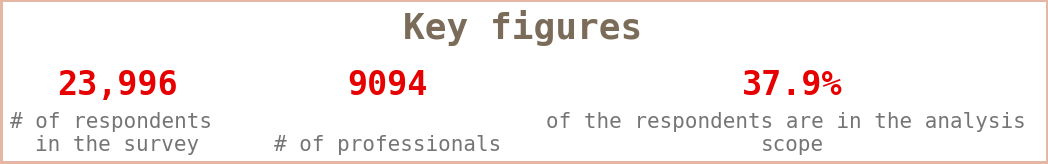

In [10]:
# text 시각화 설정? 테스트?

mpl.rcParams.update(mpl.rcParamsDefault)

fig1 = plt.figure(figsize=(5,2),facecolor='white')

ax1 = fig1.add_subplot(1,1,1)
font = 'monospace'
ax1.text(0.9, 0.8, "Key figures",color='#7b6b59',fontsize=26, fontweight='bold', fontfamily=font, ha='center')


ax1.text(0, 0.4, "{:,d}".format(df.shape[0]), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax1.text(0, 0.001, "# of respondents \nin the survey",color='#757575',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax1.text(0.6, 0.4, "{}".format(scope_df.shape[0]), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax1.text(0.6, 0.001, "# of professionals",color='#757575',fontsize=15, fontweight='light', fontfamily=font,ha='center')


ax1.text(1.5, 0.4, "{}".format(round((scope_df.shape[0]/df.shape[0] )*100, 2))+"%", color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax1.text(1.5, 0.001, "of the respondents are in the analysis \nscope",color='#757575',fontsize=15, fontweight='light', fontfamily=font, ha='center')

ax1.set_yticklabels('')
ax1.tick_params(axis='y',length=0)
ax1.tick_params(axis='x',length=0)
ax1.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax1.spines[direction].set_visible(False)

fig1.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig1.patch.set_linewidth(3)
fig1.patch.set_edgecolor('#E6b6a4')
fig1.patch.set_facecolor('white')
ax1.set_facecolor('white')
    
plt.show()

In [33]:
# 모든 다중 선택 질문을 수집하기 위한 딕셔너리 생성
multiple_choice_questions = {}  # 질문별 선택 항목 개수를 저장
seen_columns = []  # 이미 처리된 질문을 추적하기 위한 리스트

# 데이터프레임의 모든 열을 순회하며 다중 선택 질문을 식별
for col in df.columns:
    question = col.split("_")[0]  # 열 이름에서 질문 번호 추출 (예: "Q31_1" -> "Q31")
    if question in seen_columns:  # 이미 확인된 질문인 경우
        if question not in multiple_choice_questions:  
            # 해당 질문이 딕셔너리에 없다면 초기값을 2로 설정
            # (현재 열과 기존 열의 두 개 선택지를 포함하므로)
            multiple_choice_questions[question] = 2  
        else:  
            # 이미 딕셔너리에 있다면 선택지 개수를 1 증가
            multiple_choice_questions[question] = multiple_choice_questions[question] + 1
    else:
        # 처음 확인된 질문이라면 `seen_columns`에 추가
        seen_columns.append(question)

# 다중 선택 질문의 각 질문에 대해 새로운 열 추가
# 각 응답자가 해당 질문에서 선택한 답변의 개수를 계산하여 새로운 열로 저장
for col in list(multiple_choice_questions.keys()):  # 딕셔너리에서 질문 번호만 추출
    # `scope_df`에 새로운 열을 추가하여 응답자의 선택지 개수를 저장
    scope_df[f"{col}_number_of_responses"] = scope_df.apply(
        lambda x: extract_the_number_of_responses(col, x, df.columns), axis=1
    )


In [34]:
# 응답자별 평균 다중 선택 응답 수를 계산
# 행(axis=1) 단위로 평균 계산 (응답자가 선택한 전체 질문의 평균 응답 수)
respondents_mean_responses = scope_df[
    [f"{col}_number_of_responses" for col in list(multiple_choice_questions.keys())]  # 다중 선택 질문별 응답 수 컬럼 선택
].mean(axis=1).reset_index().rename(columns={0: "Mean number of responses"})  # 새로운 데이터프레임의 열 이름 설정

# 평균 응답 수가 3개를 초과하는 응답자의 비율 계산 (주석 처리된 코드):
# respondents_mean_responses["Mean number of responses"].mean(): 전체 응답자들의 평균 선택 수 계산
# (respondents_mean_responses[
#     respondents_mean_responses["Mean number of responses"] > 3
# ].shape[0]/scope_df.shape[0])*100: 평균 응답 수가 3을 초과하는 응답자의 비율 계산

# 평균 응답 수가 3개를 초과하는 응답자들만 추출 (이상치로 간주)
outliers = scope_df.filter(
    items=respondents_mean_responses[
        respondents_mean_responses["Mean number of responses"] > 3  # 평균 응답 수가 3을 초과하는 응답자들의 인덱스
    ]["index"].to_list(),  # 인덱스 리스트 추출
    axis=0  # 행 단위로 필터링
)

# 이상치 응답자 그룹을 Machine Learning 경험("Q16")별로 그룹화하고, 각 그룹의 응답자 수 계산
outliers = outliers.groupby(
    ["Q16"]  # "Q16" (Machine Learning 경험 연수) 기준으로 그룹화
).agg(
    {"Q2": "count"}  # 각 그룹의 응답자 수 계산
).reset_index().rename(
    columns={"Q2": "Nbr of respondents", "Q16": "Years of Machine Learning Experience"}  # 열 이름 변경
).sort_values(by=["Years of Machine Learning Experience"])  # 경험 연수 기준으로 정렬

# 각 그룹의 응답자 수를 총 응답자 수 대비 백분율로 변환
outliers["%"] = outliers.apply(
    lambda x: x["Nbr of respondents"] / outliers["Nbr of respondents"].sum(), axis=1
)  # 그룹별 응답자 수를 총 응답자 수로 나누어 비율 계산
outliers["%"] = np.round(outliers["%"] * 100, 2)  # 백분율 값 소수점 둘째 자리까지 반올림

# 결과를 스타일링하여 시각적으로 강조 (백분율 "%", "YlOrBr" 컬러맵 사용)
outliers.style.background_gradient(
    axis=0, cmap="YlOrBr", subset=["%"]  # "%"(백분율) 열에 대해 색상 강조
)


,Years of Machine Learning Experience,Nbr of respondents,%
0,2. < 1 years,11,6.400000
1,3. 1-2 years,28,16.280000
2,4. 2-3 years,32,18.600000
3,5. 3-4 years,23,13.370000
4,6. 4-5 years,24,13.950000
5,7. 5-10 years,43,25.000000
6,8. 10-20 years,11,6.400000


In [ ]:
# 평균 응답 수가 3개를 초과하는 응답자들만 추출 (이상치로 간주)
outliers = scope_df.filter(
    items=respondents_mean_responses[
        respondents_mean_responses["Mean number of responses"] > 3  # 평균 응답 수가 3을 초과하는 응답자들의 인덱스
    ]["index"].to_list(),  # 인덱스 리스트 추출
    axis=0  # 행 단위로 필터링
)

# 이상치 응답자 그룹을 Coding 경험("Q11")별로 그룹화하고, 각 그룹의 응답자 수 계산
outliers = outliers.groupby(
    ["Q11"]  # "Q11" (코딩 경험 연수) 기준으로 그룹화
).agg(
    {"Q2": "count"}  # 각 그룹의 응답자 수 계산
).reset_index().rename(
    columns={"Q2": "Nbr of respondents", "Q11": "Years of Coding Experience"}  # 열 이름 변경
).sort_values(by=["Years of Coding Experience"])  # 경험 연수 기준으로 정렬

# 각 그룹의 응답자 수를 총 응답자 수 대비 백분율로 변환
outliers["%"] = outliers.apply(
    lambda x: x["Nbr of respondents"] / outliers["Nbr of respondents"].sum(), axis=1
)  # 그룹별 응답자 수를 총 응답자 수로 나누어 비율 계산
outliers["%"] = np.round(outliers["%"] * 100, 2)  # 백분율 값 소수점 둘째 자리까지 반올림

# 결과를 스타일링하여 시각적으로 강조 (백분율 "%", "YlOrBr" 컬러맵 사용)
outliers.style.background_gradient(
    axis=0, cmap="YlOrBr", subset=["%"]  # "%" 백분율 열 색상 강조
)


,Years of Coding Experience,Nbr of respondents,%
0,2. < 1 years,10,5.810000
1,3. 1-3 years,31,18.020000
2,4. 3-5 years,25,14.530000
3,5. 5-10 years,45,26.160000
4,6. 10-20 years,36,20.930000
5,7. 20+ years,25,14.530000


In [ ]:
"""
아래 표에서는 응답자가 각 객관식 질문에 대해 선택한 평균 선택 수를 확인할 수 있으며 다음과 같은 결론을 내릴 수 있다.

설문조사에 참여한 전문가들은 평균 2개의 프로그래밍 언어를 정기적으로 사용하고 있으며, 3개의 머신러닝 알고리즘과 2개의 머신러닝 프레임워크를 사용하고 있다.
또한 일반적으로 Word 임베딩/벡터(GLoVe, fastText, word2vec), 인코더-디코더 모델(seq2seq, 바닐라 변환기), 상황화된 임베딩 또는 Transformer 언어 모델과 같은 자연어 처리(NLP) 방법을 사용하지 않는다.
"""

'\n아래 표에서는 응답자가 각 객관식 질문에 대해 선택한 평균 선택 수를 확인할 수 있으며 다음과 같은 결론을 내릴 수 있습니다.\n\n설문조사에 참여한 전문가들은 평균 2개의 프로그래밍 언어를 정기적으로 사용하고 있으며, 3개의 머신러닝 알고리즘과 2개의 머신러닝 프레임워크를 사용하고 있습니다.\n또한 일반적으로 Word 임베딩/벡터(GLoVe, fastText, word2vec), 인코더-디코더 모델(seq2seq, 바닐라 변환기), 상황화된 임베딩 또는 Transformer 언어 모델과 같은 자연어 처리(NLP) 방법을 사용하지 않습니다.\n'

In [36]:
outlier_analysis = []

for col in list(multiple_choice_questions.keys()):
    mean_responses = round(scope_df[f"{col}_number_of_responses"].mean())
    outlier_analysis.append([
        col,
        multiple_choice_questions[col], 
        mean_responses,
    ])
    
average_responses = pd.DataFrame(outlier_analysis, columns = ["Question", "Nbr of available Choices", "Average number of selected choices"])
average_responses["Question Title"] = questions_titles[[f"{col}_1" for col in list(multiple_choice_questions.keys())]].loc[0].to_list()
average_responses["Question Title"] = average_responses["Question Title"].apply(lambda x : x.split("(Select")[0].strip())

# 데이터프레임
scope_df.drop([f"{col}_number_of_responses" for col in list(multiple_choice_questions.keys())], axis = 1, inplace=True)

average_responses["Question Title"] = average_responses['Question Title'].str.wrap(80)
average_responses = average_responses[["Question", "Question Title", "Nbr of available Choices", "Average number of selected choices"]]
wrap_df_text(average_responses)

,Question,Question Title,Nbr of available Choices,Average number of selected choices
0,Q6,On which platforms have you begun or completed data science courses?,12,2
1,Q7,What products or platforms did you find to be most helpful when you first started studying data science?,7,2
2,Q10,"Did your research make use of machine learning? - Yes, the research made advances related to some novel machine learning method (theoretical research)",3,0
3,Q12,What programming languages do you use on a regular basis?,15,2
4,Q13,Which of the following integrated development environments (IDE's) do you use on a regular basis?,14,3
5,Q14,Do you use any of the following hosted notebook products?,16,1
6,Q15,Do you use any of the following data visualization libraries on a regular basis?,15,2
7,Q17,Which of the following machine learning frameworks do you use on a regular basis?,15,2
8,Q18,Which of the following ML algorithms do you use on a regular basis?,14,3
9,Q19,Which categories of computer vision methods do you use on a regular basis?,8,1


### 오늘날 다양한 업계의 머신러닝 도입 현황
#### 9000여명 대상으로 했고, 25%는 기술기업, 15%는 학술기업에 나머진 분포되어있다

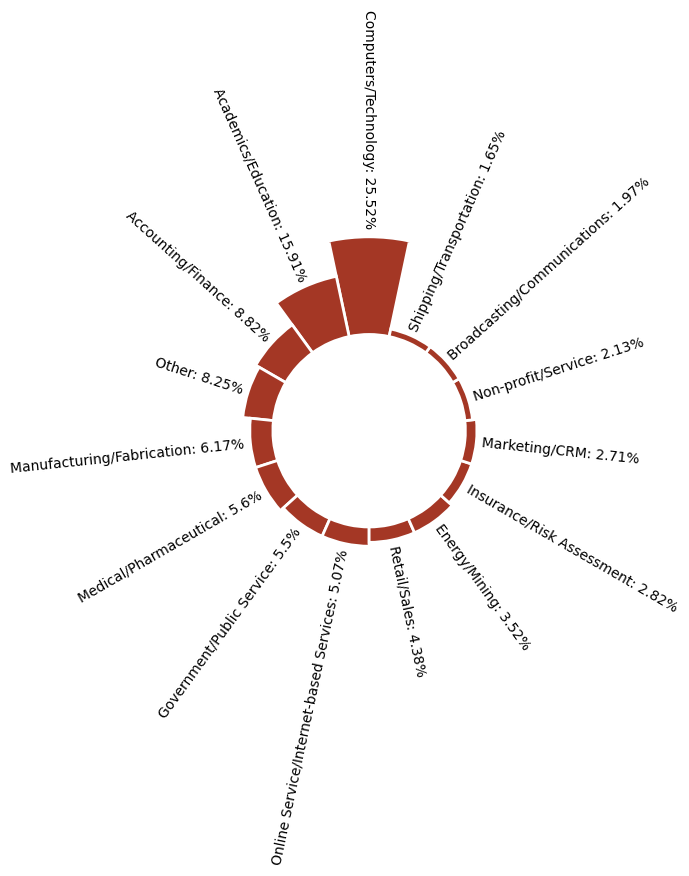

In [38]:
# get_label_rotation 함수: 각도에 따른 텍스트 회전값과 정렬을 계산
def get_label_rotation(angle, offset):
    """
    각도(angle)와 오프셋(offset)을 기반으로 텍스트의 회전값(rotation)과 정렬(alignment)을 반환.
    """
    rotation = np.rad2deg(angle + offset)  # 라디안 단위의 각도를 도(degree)로 변환
    if angle <= np.pi:  # 각도가 π 이하인 경우
        alignment = "right"  # 텍스트 정렬을 오른쪽으로 설정
        rotation = rotation + 180  # 회전값에 180도 추가
    else:  # 각도가 π 초과인 경우
        alignment = "left"  # 텍스트 정렬을 왼쪽으로 설정
    return rotation, alignment


# add_labels 함수: 차트의 라벨 추가
def add_labels(angles, values, labels, offset, ax):
    """
    원형 차트(Polar Chart)에서 각도, 값, 라벨을 기반으로 텍스트 라벨을 추가.
    """
    padding = 6  # 라벨과 막대 사이의 간격

    for angle, value, label in zip(angles, values, labels):  # 각 각도, 값, 라벨에 대해 반복
        rotation, alignment = get_label_rotation(angle, offset)  # 회전값과 정렬 계산
        y = value + padding  # 텍스트 라벨 위치를 막대의 끝에서 padding만큼 위로 설정

        ax.text(
            x=angle,  # 라벨의 각도 위치
            y=y,  # 라벨의 반지름 위치
            s=label,  # 라벨 텍스트
            ha=alignment,  # 수평 정렬
            va="center",  # 수직 정렬
            rotation=rotation,  # 텍스트 회전
            rotation_mode="anchor",  # 텍스트 회전 기준을 앵커로 설정
        )


# 원형 차트를 위한 데이터 준비
ANGLES = np.linspace(0, 2 * np.pi, scope_df["Q24"].nunique(), endpoint=False)  # 데이터 분포에 따른 각도 계산
VALUES = np.round(scope_df["Q24"].value_counts(normalize=True).values, 2) * 400  # 비율 값에 따른 막대 크기 계산
LABELS = scope_df["Q24"].value_counts().index  # 라벨 (산업 이름)

WIDTH = 2 * np.pi / len(VALUES)  # 각 막대의 너비 계산
OFFSET = np.pi / 2  # 차트 회전 오프셋 설정

# 차트 설정
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={"projection": "polar"})  # 원형 차트 생성 (Polar Projection)

ax.set_theta_offset(OFFSET)  # 차트 회전 오프셋 설정
ax.set_ylim(-100, 100)  # 반지름 범위 설정
ax.set_frame_on(False)  # 차트 외곽선 제거

ax.xaxis.grid(False)  # x축 그리드 제거
ax.yaxis.grid(False)  # y축 그리드 제거
ax.set_xticks([])  # x축 눈금 제거
ax.set_yticks([])  # y축 눈금 제거

# 막대(bar) 추가
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,  # 막대 너비 및 테두리 두께 설정
    color="#a43725", edgecolor="white"  # 막대 색상과 테두리 색상 설정
)

# 라벨 텍스트 생성
final_labels = []  # 최종 라벨 저장 리스트
test = list(np.round(scope_df["Q24"].value_counts(normalize=True).values * 100, 2))  # 비율 계산
count = 0  # 카운터 초기화
for label in LABELS:  # 각 라벨에 대해 반복
    final_labels.append(f"{label}: {test[count]}%")  # 라벨 텍스트 생성 (산업 이름과 비율)
    count += 1  # 카운터 증가

np.array(final_labels)  # 최종 라벨 리스트를 NumPy 배열로 변환

# 차트에 라벨 추가
add_labels(ANGLES, VALUES, final_labels, OFFSET, ax)

# 차트 출력
plt.show()


#### 데이터에 따르면 응답자의 약 33%가 조직에서 머신 러닝 모델을 생산 중이라고 답했고, 10.2%는 인사이트를 생성하기 위해 ML 방법을 사용한다고 함. 
#### 그러나 응답자의 상당 부분인 21.7%는 회사에서 아직 AI 및 ML 기술을 사용하기 시작하지 않았다고 답했으며, 17.1%는 이 새로운 기술의 기능을 탐색하기 시작했다고 답했다.

In [39]:
# ML Adoption 데이터 집계 및 처리
ml_adoption = scope_df.groupby(
    ["ML_adoption_class", "ML_adoption"]  # 머신러닝 채택 수준과 해당 상태별로 그룹화
).agg(
    {"Q2": "count"}  # 응답자 수를 집계
).reset_index().rename(
    columns={"Q2": "counts"}  # "Q2" 열을 "counts"로 이름 변경
)

# 첫 번째 그래프: 도넛 차트 (Pie Chart)
fig = go.Figure(data=[go.Pie(
    labels=scope_df["ML_adoption_class"].value_counts().index.to_list(),  # 라벨: ML 채택 수준
    values=list(scope_df["ML_adoption_class"].value_counts().values),  # 값: 각 수준의 응답자 수
    hole=.4  # 차트 가운데의 빈 공간 크기 설정 (도넛 모양)
)])

# (선택 사항) 차트 색상 설정
# fig.update_traces(marker=dict(colors=['#a43725', '#e0d5bd', '#beb29e', '#E6b6a4', '#c07156']))

# 도넛 차트 제목 스타일 설정
large_title_format = "<span style='font-size:30px; font-family:Times New Roman'>The State of the ML Adoption in Industry in 2022</span>"
small_title_format = "<span style='font-size:14px; font-family:Helvetica'></b></span>"

# 차트 레이아웃 설정
layout = dict(
    title=large_title_format + "<br>" + small_title_format,  # 제목 설정
    font=dict(color='#7b6b59'),  # 제목 및 텍스트 색상 설정
    showlegend=True,  # 범례 표시
    margin=dict(t=80, pad=0),  # 상단 여백 설정
)

# 설정된 레이아웃을 차트에 반영
fig["layout"].update(layout)

# 도넛 차트 표시
fig.show()

# 두 번째 그래프: Sunburst 차트
fig = px.sunburst(
    ml_adoption,  # 데이터프레임 사용
    path=["ML_adoption_class", "ML_adoption"],  # Sunburst 계층 경로 설정 (채택 수준 -> 채택 상태)
    values="counts",  # 각 노드의 값: 응답자 수
    color="ML_adoption_class",  # 색상 기준: ML 채택 수준
    color_discrete_map=ml_adoption_color_discrete_map  # 사용자 정의 색상 맵
)

# Sunburst 차트 레이아웃 설정
layout = dict(
    showlegend=False,  # 범례 숨기기
    margin=dict(t=80, pad=0, l=0),  # 여백 설정
)

# 설정된 레이아웃을 차트에 반영
fig["layout"].update(layout)

# Sunburst 차트 표시
fig.show()


In [ ]:
### pip install nbformat==5.1.2
### nbformat.__version__

In [ ]:
"""
이제 설문조사 결과에서 인사이트를 추출하여 답변함.

다음 차트에서 인터넷 기반 서비스를 제공하는 기업은 기계 학습 및 데이터 과학을 더 잘 채택, 
비영리 단체와 정부 부문은 의심할 여지없이 다양한 AI 관련 기술을 채택하고 있다는 사실을 알 수 있다. 
정부와 비영리 단체의 AI 채택률이 낮은 주요 이유는 관료주의와 너무 오래 걸리는 기존 프로세스 때문..

민간 부문에서는 고용주가 실험, 혁신, 성장에 중점을 두는 경향이 있다. 
예를 들어, 인터넷 기반 서비스를 제공하는 기업은 사용자의 온라인 활동에서 많은 데이터를 수집할 수 있으며, 
직원은 회사가 제공하는 서비스를 개선하기 위해 분석 및 기타 혁신적인 아이디어를 적용할 수 있다. 

보험 부문에서도 보험 자문, 보험금 청구 처리 인수, 사기 방지, 위험 관리, 다이렉트 마케팅에 AI 기술을 활용하고 있다. 
고객 행동과 기술의 발전으로 보험 시장에서 AI가 가치를 창출하고, 비용을 절감하고, 효율성을 높이며, 더 높은 고객 만족과 신뢰를 얻을 수 있는 문이 열렸다. 
리테일은 전체 전문가의 27%가 AI 기술을 도입했고, 리테일 부문에서 근무하는 전문가들은 자사가 생산 분야에서 머신러닝 방법을 잘 구축하고 있다고 말함.

"""

In [ ]:
# 각 산업의 발생 건수 파악
ai_adoption_totals = scope_df["Q24"].value_counts().to_dict()

# 산업별 ML 도입 단계별 발생 건수 파악
ai_adoption = scope_df.groupby(["Q24", "ML_adoption"]).agg({"Q2" : "count"}).reset_index().rename(columns={"Q2": "counts"})

# 상대 비율 가져오기
ai_adoption["relative_percent"] = ai_adoption.apply(lambda x : x["counts"] / ai_adoption_totals[x["Q24"]], axis = 1)

# 알 수 없는 다른 범주 및 상태 등은 무시
ai_adoption = ai_adoption[ai_adoption["ML_adoption"]!= "Not Known"]

hover_template = "Industry: %{x}<br>" + "AI Adoption Stage: %{y}<br>" + "Percentage: %{marker.size:,}" + "<extra></extra>"

create_scatter_plot(
    ai_adoption["Q24"],
    ai_adoption["ML_adoption"].apply(lambda x : x.split(".")[-1]), 
    hover_template,
    ai_adoption['relative_percent']*100, 
    ai_adoption['relative_percent']*100, 
    "The State of Machine Learning Adoption by Industry",
    "Questions Data: Industry (Q24) and ML Adoption State (Q27)",
    "Size,Color: Percentage of Respondents - <br>The number of respondents of the related sector that chose the relevant adoption stage of their company <br>divided by the total number of respondents working in that sector."
)

In [ ]:
# 머신러닝 채택 수준과 회사 규모별 데이터 집계
adoption_per_company_size = scope_df.groupby(
    ["Q25", "ML_adoption_class"]  # 회사 규모(Q25)와 ML 채택 수준(ML_adoption_class) 기준으로 그룹화
).agg({
    "Q2": "count"  # 응답자 수 집계
}).reset_index().rename(columns={
    "Q2": "counts"  # 집계된 값의 열 이름을 "counts"로 변경
})
adoption_per_company_size

fig = go.Figure()

# "Models in Production" 수준의 데이터를 Polar 차트에 추가
fig.add_trace(go.Scatterpolar(
      r=adoption_per_company_size[adoption_per_company_size["ML_adoption_class"] == "Models in Production"].sort_values(by=["Q25"])["counts"].to_list(),  # 반경(r): 각 회사 규모별 응답자 수
      theta=adoption_per_company_size[adoption_per_company_size["ML_adoption_class"] == "Models in Production"].sort_values(by=["Q25"])["Q25"].to_list(),  # 각도(theta): 회사 규모
      fill='toself',  # 영역 채우기
      name='Models in Production'  # 범례 이름
))

# "Exploration Stage" 수준의 데이터를 Polar 차트에 추가
fig.add_trace(go.Scatterpolar(
      r=adoption_per_company_size[adoption_per_company_size["ML_adoption_class"] == "Exploration Stage"].sort_values(by=["Q25"])["counts"].to_list(),
      theta=adoption_per_company_size[adoption_per_company_size["ML_adoption_class"] == "Exploration Stage"].sort_values(by=["Q25"])["Q25"].to_list(),
      fill='toself',
      name='Exploration Stage'
))

# "Generating Insights" 수준의 데이터를 Polar 차트에 추가
fig.add_trace(go.Scatterpolar(
      r=adoption_per_company_size[adoption_per_company_size["ML_adoption_class"] == "Generating Insights"].sort_values(by=["Q25"])["counts"].to_list(),
      theta=adoption_per_company_size[adoption_per_company_size["ML_adoption_class"] == "Generating Insights"].sort_values(by=["Q25"])["Q25"].to_list(),
      fill='toself',
      name='Generating Insights'
))

# "Not Started" 수준의 데이터를 Polar 차트에 추가
fig.add_trace(go.Scatterpolar(
      r=adoption_per_company_size[adoption_per_company_size["ML_adoption_class"] == "Not Started"].sort_values(by=["Q25"])["counts"].to_list(),
      theta=adoption_per_company_size[adoption_per_company_size["ML_adoption_class"] == "Not Started"].sort_values(by=["Q25"])["Q25"].to_list(),
      fill='toself',
      name='Not Started'
))

# 차트 제목 및 스타일 설정
large_title_format = "<span style='font-size:30px; font-family:Times New Roman'>Productionization of ML models by Company's size</span>"
small_title_format = "<span style='font-size:14px; font-family:Helvetica'></b></span>"

# 레이아웃 설정
layout = dict(
    title=large_title_format + "<br>" + small_title_format,  # 제목 설정
    font=dict(color='#7b6b59'),  # 제목 및 텍스트 색상 설정
    showlegend=True,  # 범례 표시
    margin=dict(t=80, pad=6),  # 상단 여백 및 패딩 설정
)

# 설정된 레이아웃을 차트에 반영
fig["layout"].update(layout)
fig.show()


In [ ]:
"""
대기업이 AI도입을 주도하고 있다.
결과에 따르면 직원 수가 1,000~9,999명 또는 10,000명 이상인 대기업이 AI 도입을 주도하고 있는 것으로 나타남.
- 대기업은 대형 시장에 서비스를 제공하는 경향이 있기 때문에 더 많은 매출보다 AI 생산 기술을 사용할 때 발생하는 높은 고정 비용을 더 잘 점차적으로 감소시킬 수 있다.
- 대기업은 더 높은 임금과 더 많은 혜택을 제공, AI 인재 풀을 확장함.
- AI 시스템 공급업체는 가장 큰 소비자 기반을 갖춘 기업에 공급함으로써 혜택을 받기 때문에 공급업체는 대기업과의 관계 및 계약을 체결, 이러한 기업이 비즈니스에 가져올 수 있는 가치에 더 많이 노출될 수 있도록 하는 데 집중할 수 있다.

<다음 섹션에서는 설문조사 응답에 따라 머신러닝 및 데이터 과학 프로젝트를 위한 적응 가능한 인프라를 구축하기 위해 
시장에서 사용되는 도구와 관행을 살펴볼 것.>

"""

## -- Overview of the enterprise AI technology stack --

In [ ]:
"""
머신 러닝은 얼마 전까지만 해도 엔터프라이즈 시장에서 주로 실험 단계에 있었습니다. 
데이터 사이언스 팀은 항상 개념 증명(POC) 접근 방식으로 시작하여 모델이 달성한 비즈니스 결과로 인해 표준화되지 않은 프로덕션 배포 프로세스에서도 결국 주목을 받습니다. 
재사용 가능성과 안정성으로 이 솔루션을 성공적으로 확장하려면 컴퓨팅, 메모리, 네트워킹의 아키텍처 영역에서 하드웨어와 소프트웨어를 최적화해야 합니다.


<클라우드 컴퓨팅 플랫폼 사용>
2022년 클라우드 컴퓨팅 시장에 대한 여러 보고서에 따르면 클라우드 기술의 채택은 계속 가속화되고 있습니다. 
클라우드 컴퓨팅은 머신 러닝과 인공 지능의 부상에 영향을 미쳤습니다. 
저렴한 스토리지, GPU의 가용성, 빠른 AI 교육 및 추론 성능, 낮은 비용, 공격에 대한 보호와 같은 요인으로 인해 머신 러닝에 접근할 수 있고 기업이 저렴하게 이용할 수 있게 되었습니다. 
대부분의 기업은 AI 애플리케이션을 직접 구현할 수 있는 인프라와 전문 지식이 부족합니다.

다음 레이더 차트에서 볼 수 있듯이, 생산 모델을 보유한 기업도 클라우드 컴퓨팅 플랫폼을 사용하는데, 
클라우드를 사용하면 기업이 머신 러닝 기능을 실험하고 프로젝트가 생산되고 수요가 증가함에 따라 확장하기 쉽기 때문에 합리적입니다.

"""

In [41]:
# 클라우드 컴퓨팅 플랫폼 사용 데이터 집계
cloud_usage = scope_df.groupby(
    ["Cloud_usage"]  # 클라우드 컴퓨팅 플랫폼 사용 여부(Cloud_usage) 기준으로 그룹화
).agg({
    "Q2": "count"  # 각 그룹별 응답자 수 집계
}).reset_index().rename(columns={
    "Q2": "Nbr of respondents",  # 열 이름을 "Nbr of respondents"로 변경
    "Cloud_usage": "Usage of Cloud Computing Platforms"  # 열 이름을 "Usage of Cloud Computing Platforms"로 변경
})

# 각 그룹의 응답자 비율 계산 (퍼센트)
cloud_usage["%"] = np.round((cloud_usage["Nbr of respondents"] / scope_df.shape[0]) * 100, 2)

# 테이블 스타일 설정: 퍼센트 값에 따라 파란색 그라데이션 배경 추가
cloud_usage.style.background_gradient(axis=0, cmap='Blues')


,Usage of Cloud Computing Platforms,Nbr of respondents,%
0,No,4994,54.920000
1,Yes,4100,45.080000


In [ ]:
# 머신러닝 도입 상태와 클라우드 컴퓨팅 플랫폼 사용 여부 간 관계를 분석하기 위한 데이터 생성
usage_per_adoption = scope_df.groupby(
    ["ML_adoption", "Cloud_usage"]  # 머신러닝 도입 상태(ML_adoption)와 클라우드 사용 여부(Cloud_usage) 기준으로 그룹화
).agg({
    "Q2": "count"  # 각 조합별 응답자 수 집계
}).reset_index().rename(columns={
    "Q2": "counts"  # 응답자 수 열 이름을 "counts"로 변경
})
usage_per_adoption

fig = go.Figure()

# 첫 번째 궤적: 클라우드 컴퓨팅 플랫폼을 사용하는 응답자
fig.add_trace(go.Scatterpolar(
      r=usage_per_adoption[usage_per_adoption["Cloud_usage"] == "Yes"].sort_values(by=["ML_adoption"])["counts"].to_list(),  # 클라우드 사용 그룹의 응답자 수
      theta=usage_per_adoption[usage_per_adoption["Cloud_usage"] == "Yes"].sort_values(by=["ML_adoption"])["ML_adoption"].to_list(),  # 머신러닝 도입 상태
      fill='toself',  # 궤적을 
      name='Cloud Usage: Yes'  # 범례
))

# 두 번째 궤적: 클라우드 컴퓨팅 플랫폼을 사용하지 않는 응답자
fig.add_trace(go.Scatterpolar(
      r=usage_per_adoption[usage_per_adoption["Cloud_usage"] == "No"].sort_values(by=["ML_adoption"])["counts"].to_list(),  # 클라우드 미사용 그룹의 응답자 수
      theta=usage_per_adoption[usage_per_adoption["Cloud_usage"] == "No"].sort_values(by=["ML_adoption"])["ML_adoption"].to_list(),  # 머신러닝 도입 상태
      fill='toself',  # 궤적을 채우기
      name="Cloud Usage: No"  # 범례 
))

# 제목과 스타일 
large_title_format = "<span style='font-size:30px; font-family:Times New Roman'>Cloud Usage by ML Adoption</span>"  # 큰 제목 
small_title_format = "<span style='font-size:14px; font-family:Helvetica'></b></span>"  # 작은 제목 

layout = dict(
    title=large_title_format + "<br>" + small_title_format,  # 제목
    font=dict(color='#7b6b59'),  # 폰트 색상
    showlegend=True,  # 범례
    margin=dict(t=80, pad=6),  # 여백
)

fig["layout"].update(layout)

fig.show()


### -- 머신 러닝 운영에 사용되는 클라우드 컴퓨팅 플랫폼은 무엇인가? --

In [ ]:
"""
다음 시각화에서는 국가별뿐만 아니라 부문별로 가장 인기 있는 클라우드 컴퓨팅 플랫폼을 확인할 수 있다.
아마존 웹 서비스(AWS)와 구글 클라우드 플랫폼(GCP)이 지배적일 뿐만 아니라 알리바바 클라우드가 아시아에서 꽤 유명하다.
"""

In [ ]:
# 데이터 처리 및 클라우드 컴퓨팅 플랫폼의 산업별 상대적 비율 분석
cloud_computing_platforms = [col for col in df.columns if col.startswith("Q31")]  # "Q31"로 시작하는 모든 열 추출 (클라우드 컴퓨팅 플랫폼 관련)

# 데이터를 그룹화하여 산업별 클라우드 플랫폼 사용 현황 집계
dfs_list = []
for col in cloud_computing_platforms:
    dfs_list.append(
        scope_df.groupby(["Q24", col])  # 산업(Q24)와 각 클라우드 플랫폼 열(col) 기준 그룹화
        .agg({"Q2": "count"})  # 응답자 수 집계
        .reset_index()  # 인덱스를 리셋하여 데이터프레임으로 변환
        .rename(columns={col: "Q31", "Q2": "counts"})  # 열 이름 변경
    )

# 결과 데이터프레임 병합
cloud_computing_platforms_df = pd.concat(dfs_list)

# 각 플랫폼이 산업 내에서 차지하는 상대 비율 계산
cloud_computing_platforms_df["relative_percent"] = cloud_computing_platforms_df.apply(
    lambda x: x["counts"] / industry_totals[x["Q24"]], axis=1  # 산업별 총 응답자 수를 기준으로 비율 계산
)

# "None" 및 "Other" 응답을 제거하여 주요 클라우드 플랫폼만 분석
cloud_computing_platforms_df = cloud_computing_platforms_df[
    ~cloud_computing_platforms_df["Q31"].isin(["None", "Other"])
]

# 시각화: 산점도를 이용해 산업별 클라우드 플랫폼 사용 비율 비교
create_scatter_plot(
    cloud_computing_platforms_df["Q31"].apply(lambda x: x.split("/")[0]),  # 클라우드 플랫폼 이름
    cloud_computing_platforms_df["Q24"],  # 산업 이름
    "Cloud Computing Platform: %{x}<br>" +  # 툴팁 텍스트
    "Industry: %{y}<br>" +
    "Percentage: %{marker.size:,}" +
    "<extra></extra>",
    cloud_computing_platforms_df["relative_percent"] * 100,  # 응답 비율
    cloud_computing_platforms_df["relative_percent"] * 100,  # 색상 기준 (비율)
    "Cloud Computing In Different Industries",  # 그래프 제목
    "Questions Data: Industry (Q24) and Cloud Computing Platform (31)",  # x축 제목
    "Size,Color: Percentage of Respondents - <br>The number of respondents of the related sector that chose the relevant Cloud Computing Platform<br>divided by the total number of respondents working in that sector."  # 툴팁 설명
)


In [ ]:
# 주요 클라우드 컴퓨팅 플랫폼별 국가별 점유율 분석 및 시각화

cloud_computing_questions = [col for col in scope_df.columns if col.startswith("Q31")]  # "Q31"로 시작하는 열(클라우드 컴퓨팅 관련 질문) 추출
country_totals = scope_df["Q4"].value_counts().to_dict()  # 국가별 응답자 수 집계

# 클라우드 플랫폼 데이터를 국가별로 집계
dfs_list = []
for col in cloud_computing_questions:
    dfs_list.append(
        scope_df.groupby(["Q4", col])  # 국가(Q4)와 클라우드 플랫폼(col) 기준으로 그룹화
        .agg({"Q2": "count"})  # 응답자 수 집계
        .reset_index()  # 인덱스 리셋
        .rename(columns={col: "Q31", "Q2": "counts"})  # 열 이름 변경
    )

# 데이터 병합
cloud_computing_platforms = pd.concat(dfs_list)

# 각 국가 내에서 클라우드 플랫폼이 차지하는 상대 비율 계산
cloud_computing_platforms["relative_percent"] = cloud_computing_platforms.apply(
    lambda x: x["counts"] / country_totals[x["Q4"]], axis=1  # 응답자 수를 총 응답자 수로 나눔
)

# "None" 및 "Other" 응답 제거
cloud_computing_platforms = cloud_computing_platforms[
    ~cloud_computing_platforms["Q31"].isin(["None", "Other"])
]

# 각 국가별로 가장 많이 사용된 클라우드 플랫폼 선택
cloud_computing_platforms = cloud_computing_platforms.sort_values(by=["Q4", "counts"], ascending=True)
cloud_computing_platforms = cloud_computing_platforms.drop_duplicates(subset=["Q4"], keep="last")

# 클라우드 플랫폼 이름에서 불필요한 공백 제거
cloud_computing_platforms["Q31"] = cloud_computing_platforms["Q31"].str.strip()

# 시각화: 국가별로 가장 인기 있는 클라우드 플랫폼을 색상으로 표시하는 지도 생성
fig = px.choropleth(
    locations=cloud_computing_platforms["Q4"],  # 국가 이름
    locationmode="country names",  # 위치 모드: 국가 이름 사용
    color=cloud_computing_platforms["Q31"],  # 클라우드 플랫폼 이름
    color_discrete_map={  # 클라우드 플랫폼별 색상 매핑
        "Google Cloud Platform (GCP)": "#a43725",
        "Amazon Web Services (AWS)": "#cfbd9b",
        "Microsoft Azure": "#edc860",
        "Alibaba Cloud": "#E6b6a4",
    },
)

# 제목 및 레이아웃 설정
large_title_format = (
    "<span style='font-size:30px; font-family:Times New Roman'>"
    "Most Popular Cloud Computing Platform by Country"
    "</span>"
)
small_title_format = "<span style='font-size:14px; font-family:Helvetica'></b></span>"

fig.update_layout(
    width=750,  # 그래프 너비
    legend=dict(
        orientation="h",  # 범례 가로 배치
        yanchor="bottom",  # y축 하단 정렬
        y=0.9,  # 범례의 y 위치
        xanchor="right",  # x축 오른쪽 정렬
        x=1,  # 범례의 x 위치
        title="",  # 범례 제거
    ),
    title=large_title_format + "<br>" + small_title_format,  # 제목 설정
    font=dict(color="#7b6b59"),  # 폰트 색상
    dragmode=False,  # 드래그 비활성화
    margin=dict(  # 여백
        l=10,
        r=10,
        b=10,
        t=50,
        pad=0,
    ),
)

fig.show()
